In [7]:
import os
import sys
import glob
import zlib
import math
import pickle
import pymzml
import numpy as np
import pandas as pd
import seaborn as sns
import _pickle as cpickle
import matplotlib.pyplot as plt
from importlib import reload
from collections import defaultdict as ddict
from scipy.ndimage.filters import gaussian_filter
from tensorly.decomposition import non_negative_parafac as nnp

sys.path.append(os.getcwd()+"/workflow/scripts/auxiliary/")
import LC_IM_MS_TensorAnalysis as hx

library_info=pd.read_csv("resources/library_info/library_info.csv")

timepoints = [0, 10, 16, 26, 40, 65, 105, 160, 270, 430, 690, 1050, 1680, 2640, 4200, 6600, 11400, 18900, 33600, 62220, 100800]
tp_names = ["UN", "10s", "16s", "26s", "40s", "65s", "105s", "160s", "4m30", "7m10", "11m30s", "17m30s", "28m", "44m", "70m", "1hr50", "3hr10", "5hr15", "9hr20", "17hr45", "28hr"]

line = 0

tp_inputs = [sorted([fn for fn in glob.glob("resources/tensors/"+str(line)+"_*") if tp_name in fn]) for tp_name in tp_names]

sample_un = hx.limit_read(tp_inputs[0][0])

In [8]:
proc_files = glob.glob("resources/ic_time_series/*.cpickle.zlib")

In [9]:
flat = []
proc_buf = []
for fn in proc_files:
    fn_buf = []
    tps = hx.limit_read(fn)
    for tp in tps:
        if len(tp) > 0:
            ic = tp[0]
            flat.append(ic.n_factors)
            fn_buf.append(ic.n_factors)
        else:
            pass
    proc_buf.append(fn_buf)

In [10]:
sflat = sorted(flat)

In [11]:
counts = ddict().fromkeys(sflat)
for i in sflat:
    if counts[i] is None:
        counts[i] = 1
    else:
        counts[i] += 1

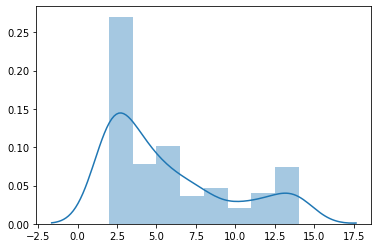

In [12]:
sns.distplot(sflat)

In [8]:
conda list

# packages in environment at /home/rwl0960/.conda/envs/dask_lab:
#
_libgcc_mutex             0.1                        main  
aioeasywebdav             2.4.0                 py37_1000    conda-forge
aiohttp                   3.6.2            py37h516909a_0    conda-forge
appdirs                   1.4.3                      py_1    conda-forge
arrow                     0.15.5                   py37_0    conda-forge
async-timeout             3.0.1                   py_1000    conda-forge
attrs                     19.1.0                   py37_1  
backcall                  0.1.0                    py37_0  
bcrypt                    3.1.7            py37h516909a_0    conda-forge
binaryornot               0.4.4                      py_1    conda-forge
biopython                 1.74             py37h516909a_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
bokeh                     2.0.0                  

In [33]:
nb_conda_list = """_libgcc_mutex             0.1                        main  
aioeasywebdav             2.4.0                 py37_1000    conda-forge
aiohttp                   3.6.2            py37h516909a_0    conda-forge
appdirs                   1.4.3                      py_1    conda-forge
arrow                     0.15.5                   py37_0    conda-forge
async-timeout             3.0.1                   py_1000    conda-forge
attrs                     19.1.0                   py37_1  
backcall                  0.1.0                    py37_0  
bcrypt                    3.1.7            py37h516909a_0    conda-forge
binaryornot               0.4.4                      py_1    conda-forge
biopython                 1.74             py37h516909a_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
bokeh                     2.0.0                    py37_0  
boto3                     1.11.0                     py_0    conda-forge
botocore                  1.14.0                     py_0    conda-forge
bzip2                     1.0.8                h516909a_2    conda-forge
ca-certificates           2019.8.28                     0  
cachetools                3.1.1                      py_0    conda-forge
cairo                     1.14.12              h8948797_3  
certifi                   2019.9.11                py37_0  
cffi                      1.13.2           py37h8022711_0    conda-forge
chardet                   3.0.4                 py37_1003    conda-forge
click                     7.0                      py37_0  
cloudpickle               1.2.2                      py_0  
configargparse            0.13.0                     py_1    conda-forge
cookiecutter              1.7.0                      py_0    conda-forge
cryptography              2.8              py37h72c5cf5_1    conda-forge
cycler                    0.10.0                   py37_0  
cytoolz                   0.10.0           py37h7b6447c_0  
dask                      2.5.2                      py_0  
dask-core                 2.5.2                      py_0  
datrie                    0.8              py37h516909a_0    conda-forge
dbus                      1.13.6               h746ee38_0  
decorator                 4.4.0                    py37_1  
defusedxml                0.6.0                      py_0  
distributed               2.5.2                      py_0  
docutils                  0.15.2                   py37_0    conda-forge
dropbox                   9.4.0                      py_0    conda-forge
entrypoints               0.3                      py37_0  
expat                     2.2.6                he6710b0_0  
fastdtw                   0.2.0                      py_1    bioconda
fftw                      3.3.8           nompi_h7f3a6c3_1110    conda-forge
filechunkio               1.8                        py_2    conda-forge
fontconfig                2.13.0               h9420a91_0  
freetype                  2.9.1                h8a8886c_1  
fsspec                    0.5.1                      py_0  
ftputil                   3.4                        py_0    conda-forge
future                    0.18.2                   py37_0    conda-forge
gettext                   0.19.8.1          hc5be6a0_1002    conda-forge
ghostscript               9.18                          1    bioconda
giflib                    5.1.9                h516909a_0    conda-forge
gitdb2                    2.0.6                      py_0    conda-forge
gitpython                 3.0.5                      py_0    conda-forge
glib                      2.56.2               hd408876_0  
gmp                       6.1.2                h6c8ec71_1  
google-api-core           1.15.0                   py37_0    conda-forge
google-auth               1.10.0                     py_0    conda-forge
google-cloud-core         1.1.0                      py_0    conda-forge
google-cloud-storage      1.24.1                   py37_0    conda-forge
google-resumable-media    0.5.0                      py_0    conda-forge
googleapis-common-protos  1.6.0                    py37_0    conda-forge
graphite2                 1.3.13            hf484d3e_1000    conda-forge
graphviz                  2.38.0            hcf1ce16_1009    conda-forge
gst-plugins-base          1.14.0               hbbd80ab_1  
gstreamer                 1.14.0               hb453b48_1  
harfbuzz                  1.9.0             he243708_1001    conda-forge
heapdict                  1.0.1                      py_0  
icu                       58.2                 h9c2bf20_1  
idna                      2.8                   py37_1000    conda-forge
imagemagick               7.0.8_11        pl526hc610aec_0    conda-forge
intel-openmp              2019.4                      243  
ipdb                      0.12.3                    <pip>
ipykernel                 5.1.2            py37h39e3cac_0  
ipython                   7.8.0            py37h39e3cac_0  
ipython_genutils          0.2.0                    py37_0  
jbig                      2.1               h14c3975_2001    conda-forge
jedi                      0.15.1                   py37_0  
jinja2                    2.10.1                   py37_0  
jinja2-time               0.2.0                      py_2    conda-forge
jmespath                  0.9.4                      py_0    conda-forge
joblib                    0.14.0                     py_0  
jpeg                      9c                h14c3975_1001    conda-forge
json5                     0.8.5                      py_0  
jsonschema                3.0.2                    py37_0  
jupyter_client            5.3.3                    py37_1  
jupyter_core              4.5.0                      py_0  
jupyterlab                1.1.4              pyhf63ae98_0  
jupyterlab_server         1.0.6                      py_0  
kiwisolver                1.1.0            py37he6710b0_0  
libedit                   3.1.20181209         hc058e9b_0  
libffi                    3.2.1                hd88cf55_4  
libgcc                    7.2.0                h69d50b8_2    conda-forge
libgcc-ng                 9.1.0                hdf63c60_0  
libgfortran-ng            7.3.0                hdf63c60_0  
libpng                    1.6.37               hbc83047_0  
libprotobuf               3.11.2               h8b12597_0    conda-forge
libsodium                 1.0.16               h1bed415_0  
libstdcxx-ng              9.1.0                hdf63c60_0  
libtiff                   4.0.10               h2733197_2  
libtool                   2.4.6             h14c3975_1002    conda-forge
libuuid                   1.0.3                h1bed415_2  
libwebp                   0.5.2                         7    conda-forge
libxcb                    1.13                 h1bed415_1  
libxml2                   2.9.9                hea5a465_1  
locket                    0.2.0                    py37_1  
markupsafe                1.1.1            py37h7b6447c_0  
matplotlib                3.1.1            py37h5429711_0  
mistune                   0.8.4            py37h7b6447c_0  
mkl                       2019.4                      243  
mkl-service               2.3.0            py37he904b0f_0  
mkl_fft                   1.0.14           py37ha843d7b_0  
mkl_random                1.1.0            py37hd6b4f25_0  
msgpack-python            0.6.1            py37hfd86e86_1  
multidict                 4.7.3            py37h516909a_0    conda-forge
nbconvert                 5.6.0                    py37_1  
nbformat                  4.4.0                    py37_0  
ncurses                   6.1                  he6710b0_1  
networkx                  2.4                        py_0    conda-forge
nodejs                    10.13.0              he6710b0_0  
notebook                  6.0.1                    py37_0  
numpy                     1.17.2           py37haad9e8e_0  
numpy-base                1.17.2           py37hde5b4d6_0  
olefile                   0.46                     py37_0  
openjpeg                  2.3.1                h21c5421_1    conda-forge
openssl                   1.1.1d               h7b6447c_2  
packaging                 19.2                       py_0  
pandas                    0.25.1           py37he6710b0_0  
pandoc                    2.2.3.2                       0  
pandocfilters             1.4.2                    py37_1  
pango                     1.40.14              he752989_2    conda-forge
paramiko                  2.7.1                    py37_0    conda-forge
parso                     0.5.1                      py_0  
partd                     1.0.0                      py_0  
patsy                     0.5.1                    py37_0  
pcre                      8.43                 he6710b0_0  
perl                      5.26.2            h516909a_1006    conda-forge
pexpect                   4.7.0                    py37_0  
pickleshare               0.7.5                    py37_0  
pillow                    6.1.0            py37h34e0f95_0  
pip                       19.2.3                   py37_0  
pixman                    0.38.0            h516909a_1003    conda-forge
pkg-config                0.29.2            h516909a_1006    conda-forge
poyo                      0.5.0                      py_0    conda-forge
prettytable               0.7.2                      py_3    conda-forge
prometheus_client         0.7.1                      py_0  
prompt_toolkit            2.0.9                    py37_0  
protobuf                  3.11.2           py37he1b5a44_0    conda-forge
psutil                    5.6.3            py37h7b6447c_0  
ptyprocess                0.6.0                    py37_0  
pyasn1                    0.4.8                      py_0    conda-forge
pyasn1-modules            0.2.7                      py_0    conda-forge
pycparser                 2.19                     py37_1    conda-forge
pygments                  2.4.2                      py_0  
pygraphviz                1.5             py37h516909a_1001    conda-forge
pynacl                    1.3.0           py37h516909a_1001    conda-forge
pyopenssl                 19.1.0                   py37_0    conda-forge
pyparsing                 2.4.2                      py_0  
pypdf2                    1.26.0                     py_2    conda-forge
pyqt                      5.9.2            py37h05f1152_2  
pyrsistent                0.15.4           py37h7b6447c_0  
pysftp                    0.2.9                      py_1    conda-forge
pysocks                   1.7.1                    py37_0    conda-forge
python                    3.7.4                h265db76_1  
python-dateutil           2.8.0                    py37_0  
python-irodsclient        0.7.0                      py_0    conda-forge
pytz                      2019.2                     py_0  
pyyaml                    5.1.2            py37h7b6447c_0  
pyzmq                     18.1.0           py37he6710b0_0  
qt                        5.9.7                h5867ecd_1  
ratelimiter               1.2.0                 py37_1000    conda-forge
readline                  7.0                  h7b6447c_5  
requests                  2.22.0                   py37_1    conda-forge
rsa                       4.0                        py_0    conda-forge
s3transfer                0.3.0                    py37_0    conda-forge
scikit-learn              0.21.3           py37hd81dba3_0  
scipy                     1.5.2            py37h0b6359f_0  
seaborn                   0.9.0                    py37_0  
send2trash                1.5.0                    py37_0  
setuptools                41.2.0                   py37_0  
simanneal                 0.4.2                      py_0    conda-forge
sip                       4.19.8           py37hf484d3e_0  
six                       1.12.0                   py37_0  
smmap2                    2.0.5                      py_0    conda-forge
snakemake                 5.9.1                         0    bioconda
snakemake-minimal         5.9.1                      py_0    bioconda
sortedcontainers          2.1.0                    py37_0  
sqlite                    3.30.0               h7b6447c_0  
statsmodels               0.10.1           py37hdd07704_0  
tblib                     1.4.0                      py_0  
terminado                 0.8.2                    py37_0  
testpath                  0.4.2                    py37_0  
tk                        8.6.8                hbc83047_0  
toolz                     0.10.0                     py_0  
tornado                   6.0.3            py37h7b6447c_0  
traitlets                 4.3.2                    py37_0  
typing_extensions         3.7.4.1                  py37_0  
urllib3                   1.25.7                   py37_0    conda-forge
wcwidth                   0.1.7                    py37_0  
webencodings              0.5.1                    py37_1  
wheel                     0.33.6                   py37_0  
whichcraft                0.6.1                      py_0    conda-forge
wrapt                     1.11.2           py37h516909a_0    conda-forge
xmlrunner                 1.7.7                      py_0    conda-forge
xorg-kbproto              1.0.7             h14c3975_1002    conda-forge
xorg-libice               1.0.10               h516909a_0    conda-forge
xorg-libsm                1.2.2                h470a237_5    conda-forge
xorg-libx11               1.6.9                h516909a_0    conda-forge
xorg-libxext              1.3.4                h516909a_0    conda-forge
xorg-libxpm               3.5.13               h516909a_0    conda-forge
xorg-libxrender           0.9.10            h516909a_1002    conda-forge
xorg-libxt                1.1.5             h516909a_1003    conda-forge
xorg-renderproto          0.11.1            h14c3975_1002    conda-forge
xorg-xextproto            7.3.0             h14c3975_1002    conda-forge
xorg-xproto               7.0.31            h14c3975_1007    conda-forge
xz                        5.2.4                h14c3975_4  
yaml                      0.1.7                had09818_2  
yarl                      1.3.0           py37h516909a_1000    conda-forge
zeromq                    4.3.1                he6710b0_3  
zict                      1.0.0                      py_0  
zlib                      1.2.11               h7b6447c_3  
zstd                      1.3.7                h0b5b093_0  """

term_conda_list = """_libgcc_mutex             0.1                        main  
aioeasywebdav             2.4.0                 py37_1000    conda-forge
aiohttp                   3.6.2            py37h516909a_0    conda-forge
appdirs                   1.4.3                      py_1    conda-forge
arrow                     0.15.5                   py37_0    conda-forge
async-timeout             3.0.1                   py_1000    conda-forge
attrs                     19.1.0                   py37_1  
backcall                  0.1.0                    py37_0  
bcrypt                    3.1.7            py37h516909a_0    conda-forge
binaryornot               0.4.4                      py_1    conda-forge
biopython                 1.74             py37h516909a_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
bokeh                     2.0.0                    py37_0  
boto3                     1.11.0                     py_0    conda-forge
botocore                  1.14.0                     py_0    conda-forge
bzip2                     1.0.8                h516909a_2    conda-forge
ca-certificates           2019.8.28                     0  
cachetools                3.1.1                      py_0    conda-forge
cairo                     1.14.12              h8948797_3  
certifi                   2019.9.11                py37_0  
cffi                      1.13.2           py37h8022711_0    conda-forge
chardet                   3.0.4                 py37_1003    conda-forge
click                     7.0                      py37_0  
cloudpickle               1.2.2                      py_0  
configargparse            0.13.0                     py_1    conda-forge
cookiecutter              1.7.0                      py_0    conda-forge
cryptography              2.8              py37h72c5cf5_1    conda-forge
cycler                    0.10.0                   py37_0  
cytoolz                   0.10.0           py37h7b6447c_0  
dask                      2.5.2                      py_0  
dask-core                 2.5.2                      py_0  
datrie                    0.8              py37h516909a_0    conda-forge
dbus                      1.13.6               h746ee38_0  
decorator                 4.4.0                    py37_1  
defusedxml                0.6.0                      py_0  
distributed               2.5.2                      py_0  
docutils                  0.15.2                   py37_0    conda-forge
dropbox                   9.4.0                      py_0    conda-forge
entrypoints               0.3                      py37_0  
expat                     2.2.6                he6710b0_0  
fastdtw                   0.2.0                      py_1    bioconda
fftw                      3.3.8           nompi_h7f3a6c3_1110    conda-forge
filechunkio               1.8                        py_2    conda-forge
fontconfig                2.13.0               h9420a91_0  
freetype                  2.9.1                h8a8886c_1  
fsspec                    0.5.1                      py_0  
ftputil                   3.4                        py_0    conda-forge
future                    0.18.2                   py37_0    conda-forge
gettext                   0.19.8.1          hc5be6a0_1002    conda-forge
ghostscript               9.18                          1    bioconda
giflib                    5.1.9                h516909a_0    conda-forge
gitdb2                    2.0.6                      py_0    conda-forge
gitpython                 3.0.5                      py_0    conda-forge
glib                      2.56.2               hd408876_0  
gmp                       6.1.2                h6c8ec71_1  
google-api-core           1.15.0                   py37_0    conda-forge
google-auth               1.10.0                     py_0    conda-forge
google-cloud-core         1.1.0                      py_0    conda-forge
google-cloud-storage      1.24.1                   py37_0    conda-forge
google-resumable-media    0.5.0                      py_0    conda-forge
googleapis-common-protos  1.6.0                    py37_0    conda-forge
graphite2                 1.3.13            hf484d3e_1000    conda-forge
graphviz                  2.38.0            hcf1ce16_1009    conda-forge
gst-plugins-base          1.14.0               hbbd80ab_1  
gstreamer                 1.14.0               hb453b48_1  
harfbuzz                  1.9.0             he243708_1001    conda-forge
heapdict                  1.0.1                      py_0  
icu                       58.2                 h9c2bf20_1  
idna                      2.8                   py37_1000    conda-forge
imagemagick               7.0.8_11        pl526hc610aec_0    conda-forge
intel-openmp              2019.4                      243  
ipdb                      0.12.3                    <pip>
ipykernel                 5.1.2            py37h39e3cac_0  
ipython                   7.8.0            py37h39e3cac_0  
ipython_genutils          0.2.0                    py37_0  
jbig                      2.1               h14c3975_2001    conda-forge
jedi                      0.15.1                   py37_0  
jinja2                    2.10.1                   py37_0  
jinja2-time               0.2.0                      py_2    conda-forge
jmespath                  0.9.4                      py_0    conda-forge
joblib                    0.14.0                     py_0  
jpeg                      9c                h14c3975_1001    conda-forge
json5                     0.8.5                      py_0  
jsonschema                3.0.2                    py37_0  
jupyter_client            5.3.3                    py37_1  
jupyter_core              4.5.0                      py_0  
jupyterlab                1.1.4              pyhf63ae98_0  
jupyterlab_server         1.0.6                      py_0  
kiwisolver                1.1.0            py37he6710b0_0  
libedit                   3.1.20181209         hc058e9b_0  
libffi                    3.2.1                hd88cf55_4  
libgcc                    7.2.0                h69d50b8_2    conda-forge
libgcc-ng                 9.1.0                hdf63c60_0  
libgfortran-ng            7.3.0                hdf63c60_0  
libpng                    1.6.37               hbc83047_0  
libprotobuf               3.11.2               h8b12597_0    conda-forge
libsodium                 1.0.16               h1bed415_0  
libstdcxx-ng              9.1.0                hdf63c60_0  
libtiff                   4.0.10               h2733197_2  
libtool                   2.4.6             h14c3975_1002    conda-forge
libuuid                   1.0.3                h1bed415_2  
libwebp                   0.5.2                         7    conda-forge
libxcb                    1.13                 h1bed415_1  
libxml2                   2.9.9                hea5a465_1  
locket                    0.2.0                    py37_1  
markupsafe                1.1.1            py37h7b6447c_0  
matplotlib                3.1.1            py37h5429711_0  
mistune                   0.8.4            py37h7b6447c_0  
mkl                       2019.4                      243  
mkl-service               2.3.0            py37he904b0f_0  
mkl_fft                   1.0.14           py37ha843d7b_0  
mkl_random                1.1.0            py37hd6b4f25_0  
msgpack-python            0.6.1            py37hfd86e86_1  
multidict                 4.7.3            py37h516909a_0    conda-forge
nbconvert                 5.6.0                    py37_1  
nbformat                  4.4.0                    py37_0  
ncurses                   6.1                  he6710b0_1  
networkx                  2.4                        py_0    conda-forge
nodejs                    10.13.0              he6710b0_0  
notebook                  6.0.1                    py37_0  
numpy                     1.17.2           py37haad9e8e_0  
numpy-base                1.17.2           py37hde5b4d6_0  
olefile                   0.46                     py37_0  
openjpeg                  2.3.1                h21c5421_1    conda-forge
openssl                   1.1.1d               h7b6447c_2  
packaging                 19.2                       py_0  
pandas                    0.25.1           py37he6710b0_0  
pandoc                    2.2.3.2                       0  
pandocfilters             1.4.2                    py37_1  
pango                     1.40.14              he752989_2    conda-forge
paramiko                  2.7.1                    py37_0    conda-forge
parso                     0.5.1                      py_0  
partd                     1.0.0                      py_0  
patsy                     0.5.1                    py37_0  
pcre                      8.43                 he6710b0_0  
perl                      5.26.2            h516909a_1006    conda-forge
pexpect                   4.7.0                    py37_0  
pickleshare               0.7.5                    py37_0  
pillow                    6.1.0            py37h34e0f95_0  
pip                       19.2.3                   py37_0  
pixman                    0.38.0            h516909a_1003    conda-forge
pkg-config                0.29.2            h516909a_1006    conda-forge
poyo                      0.5.0                      py_0    conda-forge
prettytable               0.7.2                      py_3    conda-forge
prometheus_client         0.7.1                      py_0  
prompt_toolkit            2.0.9                    py37_0  
protobuf                  3.11.2           py37he1b5a44_0    conda-forge
psutil                    5.6.3            py37h7b6447c_0  
ptyprocess                0.6.0                    py37_0  
pyasn1                    0.4.8                      py_0    conda-forge
pyasn1-modules            0.2.7                      py_0    conda-forge
pycparser                 2.19                     py37_1    conda-forge
pygments                  2.4.2                      py_0  
pygraphviz                1.5             py37h516909a_1001    conda-forge
pynacl                    1.3.0           py37h516909a_1001    conda-forge
pyopenssl                 19.1.0                   py37_0    conda-forge
pyparsing                 2.4.2                      py_0  
pypdf2                    1.26.0                     py_2    conda-forge
pyqt                      5.9.2            py37h05f1152_2  
pyrsistent                0.15.4           py37h7b6447c_0  
pysftp                    0.2.9                      py_1    conda-forge
pysocks                   1.7.1                    py37_0    conda-forge
python                    3.7.4                h265db76_1  
python-dateutil           2.8.0                    py37_0  
python-irodsclient        0.7.0                      py_0    conda-forge
pytz                      2019.2                     py_0  
pyyaml                    5.1.2            py37h7b6447c_0  
pyzmq                     18.1.0           py37he6710b0_0  
qt                        5.9.7                h5867ecd_1  
ratelimiter               1.2.0                 py37_1000    conda-forge
readline                  7.0                  h7b6447c_5  
requests                  2.22.0                   py37_1    conda-forge
rsa                       4.0                        py_0    conda-forge
s3transfer                0.3.0                    py37_0    conda-forge
scikit-learn              0.21.3           py37hd81dba3_0  
scipy                     1.5.2            py37h0b6359f_0  
seaborn                   0.9.0                    py37_0  
send2trash                1.5.0                    py37_0  
setuptools                41.2.0                   py37_0  
simanneal                 0.4.2                      py_0    conda-forge
sip                       4.19.8           py37hf484d3e_0  
six                       1.12.0                   py37_0  
smmap2                    2.0.5                      py_0    conda-forge
snakemake                 5.9.1                         0    bioconda
snakemake-minimal         5.9.1                      py_0    bioconda
sortedcontainers          2.1.0                    py37_0  
sqlite                    3.30.0               h7b6447c_0  
statsmodels               0.10.1           py37hdd07704_0  
tblib                     1.4.0                      py_0  
terminado                 0.8.2                    py37_0  
testpath                  0.4.2                    py37_0  
tk                        8.6.8                hbc83047_0  
toolz                     0.10.0                     py_0  
tornado                   6.0.3            py37h7b6447c_0  
traitlets                 4.3.2                    py37_0  
typing_extensions         3.7.4.1                  py37_0  
urllib3                   1.25.7                   py37_0    conda-forge
wcwidth                   0.1.7                    py37_0  
webencodings              0.5.1                    py37_1  
wheel                     0.33.6                   py37_0  
whichcraft                0.6.1                      py_0    conda-forge
wrapt                     1.11.2           py37h516909a_0    conda-forge
xmlrunner                 1.7.7                      py_0    conda-forge
xorg-kbproto              1.0.7             h14c3975_1002    conda-forge
xorg-libice               1.0.10               h516909a_0    conda-forge
xorg-libsm                1.2.2                h470a237_5    conda-forge
xorg-libx11               1.6.9                h516909a_0    conda-forge
xorg-libxext              1.3.4                h516909a_0    conda-forge
xorg-libxpm               3.5.13               h516909a_0    conda-forge
xorg-libxrender           0.9.10            h516909a_1002    conda-forge
xorg-libxt                1.1.5             h516909a_1003    conda-forge
xorg-renderproto          0.11.1            h14c3975_1002    conda-forge
xorg-xextproto            7.3.0             h14c3975_1002    conda-forge
xorg-xproto               7.0.31            h14c3975_1007    conda-forge
xz                        5.2.4                h14c3975_4  
yaml                      0.1.7                had09818_2  
yarl                      1.3.0           py37h516909a_1000    conda-forge
zeromq                    4.3.1                he6710b0_3  
zict                      1.0.0                      py_0  
zlib                      1.2.11               h7b6447c_3  
zstd                      1.3.7                h0b5b093_0  """

In [34]:
nb_lib_vers = [[j for j in i.split(' ') if j is not ''][:2] for i in nb_conda_list.split("\n")]
nb_libs = [i[0] for i in nb_lib_vers]

term_lib_vers = [[j for j in i.split(' ') if j is not ''][:2] for i in term_conda_list.split("\n")]
term_libs = [i[0] for i in term_lib_vers]

In [36]:
version_dict = ddict()
for i in nb_lib_vers:
    version_dict[i[0]] = i[1]

In [38]:
keys = version_dict.keys()
for i in term_lib_vers:
    if i[0] in keys:
        if version_dict[i[0]] == i[1]:
            pass
        else:
            print('version_mismatch: '+i[0])
    else:
        print('module mismatch: '+i[0])

In [2]:
1800/25*8/60

9.6

In [3]:
lines = [line]

In [4]:
#Generate rt-group ics
for line in lines:
    paths = glob.glob("resources/tensors/"+str(line)+"_*")    
    tp_inputs = [[fn for fn in paths if tp_name in fn] for tp_name in tp_names]
    name = library_info.iloc[line]['name']

    t = hx.TensorGenerator(name, library_info, tp_inputs, timepoints)
    t.generate_tensors()
    hx.limit_write(t.all_tp_clusters, "resources/ic_time_series/"+t.name+"_all_tp_clusters.cpickle.zlib")

Starting 0 seconds, 1 of 21
Sourcefile: resources/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib, 1 of 3
File: resources/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib
Reprofiling...
T+1.4698243141174316
Beginning Factorization...
Filtering... T+0.00021910667419433594
Zeroing Non-POI M/z... T+0.0003180503845214844
Start Factorization Series... T+0.0050373077392578125
Starting 14 Factors... T+0.0002548694610595703
Factorization Duration: 2.197138786315918
Starting 13 Factors... T+2.1986067295074463
Factorization Duration: 2.0444602966308594
Starting 12 Factors... T+4.244719982147217
Factorization Duration: 1.8798737525939941
Starting 11 Factors... T+6.125582695007324
Factorization Duration: 1.747236728668213
Starting 10 Factors... T+7.873871088027954
Factorization Duration: 1.62093186378479
Saving Factor Objects... T+9.501122236251831
Done: T+9.516995429992676
Sourcefile: resources/tensors/0_180604_Mix2_MES_nonlin_UN3.mzML.gz.cpickle.zlib, 2 of 3
File: resources/tens

In [25]:
for tp in t.all_tp_clusters:
    print(len(tp))

NameError: name 't' is not defined

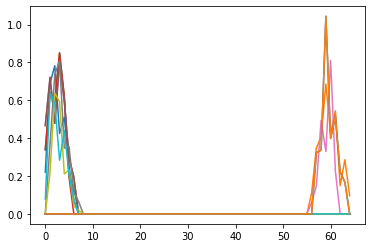

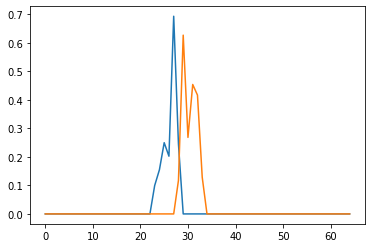

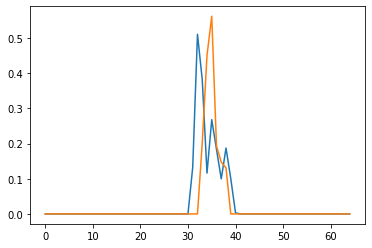

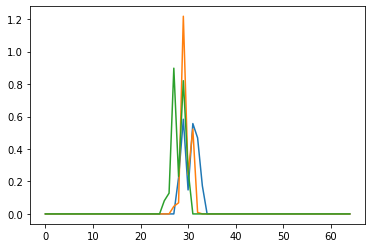

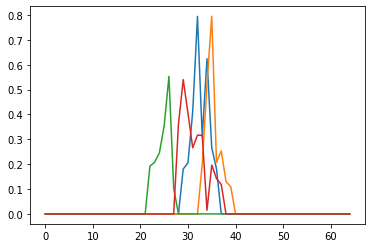

<Figure size 432x288 with 0 Axes>

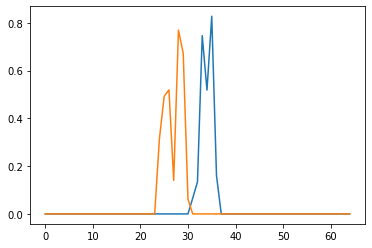

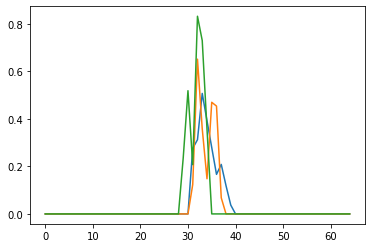

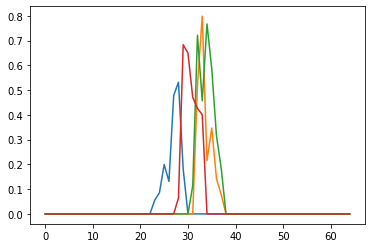

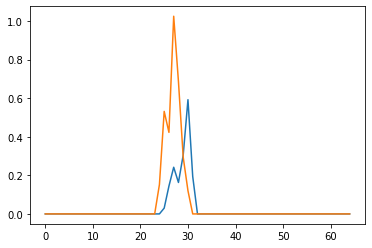

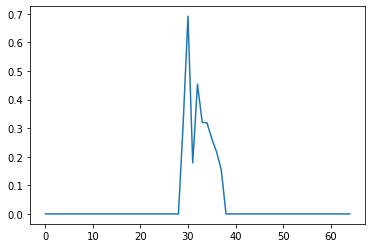

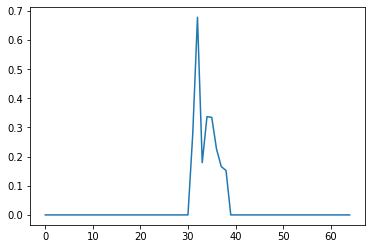

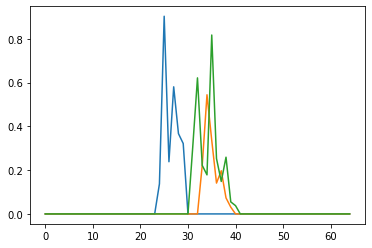

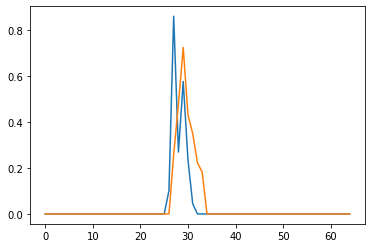

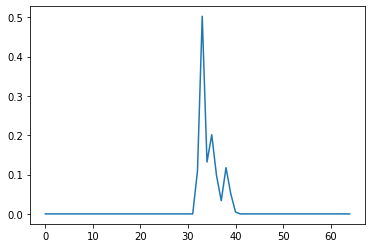

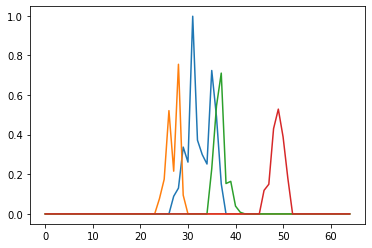

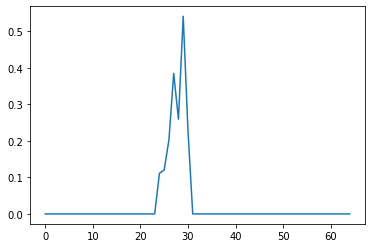

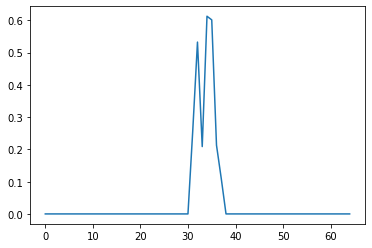

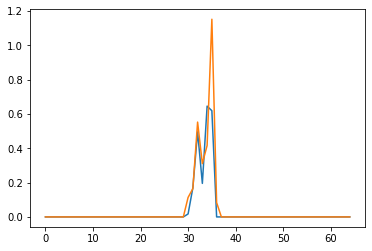

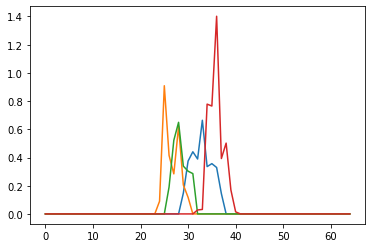

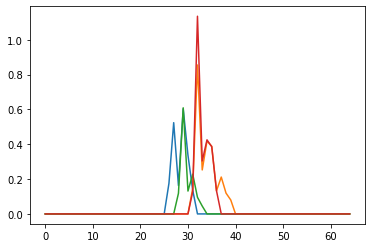

In [5]:
for tp in t.all_tp_clusters:
    plt.figure()
    for ic in tp:
        plt.plot(ic.baseline_integrated_mz)
    plt.show()
    plt.close()

In [ ]:
#PO and bokeh plot
for line in subset_indices[:2]:
    
    name = library_info.iloc[line]['name']
    
    all_tp_clusters = hx.limit_read("data/ic_time_series/"+library_info.iloc[line]['name']+"_all_tp_clusters.cpickle.zlib")
    
    po = hx.PathOptimizer(name, all_tp_clusters, library_info, timepoints, n_undeut_runs = 3, old_data_dir = "/Users/rwl0960/Documents/hdx/local_LIMIT/data/old_data/")

    po.optimize_paths()

    source_frame, old_df = po.bokeh_plot("plots/"+name+"_time_series.html")